In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainX.csv")
y_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainY.csv")

In [3]:
X_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,435101,11,9,502,4076,198,0,45.636364,76.357413,...,340,4,0.0,0.0,0,0,0.0,0.0,0,0
1,80,84692281,6,8,393,11595,375,0,65.500000,151.651904,...,235,3,12021.0,0.0,12021,12021,84500000.0,0.0,84500000,84500000
2,2035,78,1,1,2,6,2,2,2.000000,0.000000,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1467387,39,46,2568,6954,408,0,65.846154,103.092585,...,245,24,0.0,0.0,0,0,0.0,0.0,0,0
4,53,31235,2,2,74,238,37,37,37.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0


In [4]:
y_train.head()

,binary_label
0,0
1,1
2,1
3,0
4,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[6.75974670e-03, 3.62594136e-03, 4.55046005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 7.05769050e-01, 2.27523003e-05, ...,
        0.00000000e+00, 7.04166667e-01, 7.04166667e-01],
       [3.10521096e-02, 7.49999938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22072175e-03, 6.44914946e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.17174029e-04, 7.99999933e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 6.75271860e-01, 3.18532204e-05, ...,
        5.56148423e-01, 5.88333333e-01, 8.44348833e-02]])

In [6]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_train_reshaped

array([[[6.75974670e-03],
        [3.62594136e-03],
        [4.55046005e-05],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [7.05769050e-01],
        [2.27523003e-05],
        ...,
        [0.00000000e+00],
        [7.04166667e-01],
        [7.04166667e-01]],

       [[3.10521096e-02],
        [7.49999938e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22072175e-03],
        [6.44914946e-03],
        [9.10092010e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[7.17174029e-04],
        [7.99999933e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [6.75271860e-01],
        [3.18532204e-05],
        ...,
        [5.56148423e-01],
        [5.8833

In [7]:
X_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testX.csv")
y_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testY.csv")

In [8]:
X_test.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,85294,2,2,62,314,31,31,31.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
1,80,1031973,3,4,26,11601,20,0,8.666667,10.263203,...,229,2,0.0,0.0,0,0,0.0,0.0,0,0
2,37457,55,1,1,0,0,0,0,0.000000,0.000000,...,379,0,0.0,0.0,0,0,0.0,0.0,0,0
3,53,203,2,2,64,96,32,32,32.000000,0.000000,...,-1,1,0.0,0.0,0,0,0.0,0.0,0,0
4,53,103416977,2,2,92,148,48,44,46.000000,2.828427,...,-1,1,30311.0,0.0,30311,30311,103000000.0,0.0,103000000,103000000


In [9]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[8.08740501e-04, 7.10891637e-04, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22074038e-03, 8.59988298e-03, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.71565905e-01, 5.66666643e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22074038e-03, 7.09986887e-02, 1.37201187e-05, ...,
        0.00000000e+00, 7.09981750e-02, 7.09981750e-02],
       [8.08740501e-04, 2.22499991e-06, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.98672445e-02, 1.14999995e-06, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [10]:
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_test_reshaped

array([[[8.08740501e-04],
        [7.10891637e-04],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22074038e-03],
        [8.59988298e-03],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[5.71565905e-01],
        [5.66666643e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22074038e-03],
        [7.09986887e-02],
        [1.37201187e-05],
        ...,
        [0.00000000e+00],
        [7.09981750e-02],
        [7.09981750e-02]],

       [[8.08740501e-04],
        [2.22499991e-06],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[4.98672445e-02],
        [1.14999995e-06],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.0000

In [12]:
# Reshapig data for Transformer

# Transformer expects 3D input: (batch, sequence_length, channels)
# Treating each feature as a "token" with a single dimension.

X_train_3D = np.expand_dims(X_train_reshaped, axis=-1)   # (N, 60, 1)
X_test_3D  = np.expand_dims(X_test_reshaped, axis=-1)

X_train_3D.shape, X_test_3D.shape

((2807278, 60, 1, 1), (831864, 60, 1, 1))

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Token embedding layer
class FeatureTokenEmbedding(layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.dense = layers.Dense(d_model)

    def call(self, x):
        return self.dense(x)


# Transformer encoder block
def transformer_encoder(inputs, num_heads=4, dff=128, dropout=0.1):
    # Multi-head self-attention
    x = layers.LayerNormalization()(inputs)
    x = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=inputs.shape[-1]
    )(x, x)
    x = layers.Dropout(dropout)(x)
    x = layers.Add()([inputs, x])

    # Feed-forward network
    y = layers.LayerNormalization()(x)
    y = layers.Dense(dff, activation="relu")(y)
    y = layers.Dense(inputs.shape[-1])(y)
    y = layers.Dropout(dropout)(y)

    return layers.Add()([x, y])

In [15]:
# MODEL DEFINITION

seq_len = X_train.shape[1]     # 60 features
d_model = 32                   # embedding dimension
num_heads = 4
num_layers = 3

inputs = keras.Input(shape=(seq_len, 1))
x = FeatureTokenEmbedding(d_model)(inputs)

for _ in range(num_layers):
    x = transformer_encoder(x, num_heads=num_heads, dff=128)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)

# Using sigmoid for binary classification
output = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 feature_token_embedding (Featu  (None, 60, 32)      64          ['input_1[0][0]']                
 reTokenEmbedding)                                                                                
                                                                                                  
 layer_normalization (LayerNorm  (None, 60, 32)      64          ['feature_token_embedding[0][0]']
 alization)                                                                                       
                                                                                              

 dropout_6 (Dropout)            (None, 64)           0           ['dense_7[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 1)            65          ['dropout_6[0][0]']              
                                                                                                  
Total params: 78,081
Trainable params: 78,081
Non-trainable params: 0
__________________________________________________________________________________________________


In [16]:
# Dataset pipeline

batch_size = 2048

train_ds = tf.data.Dataset.from_tensor_slices((X_train_3D, y_train)) \
    .shuffle(20000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test_3D, y_test)) \
    .batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [17]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float32'))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)

    return 2 * (precision * recall) / (precision + recall + 1e-7)

In [19]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score])
history = model.fit(X_train_3D, y_train, batch_size=1024, epochs=40, validation_data=(X_test_3D, y_test), callbacks=[early_stop])

Epoch 1/40
2742/2742 [==============================] - 5437s 2s/step - loss: 0.1970 - accuracy: 0.9208 - precision: 0.9004 - recall: 0.9463 - f1_score: 0.9219 - val_loss: 0.1729 - val_accuracy: 0.9208 - val_precision: 0.7073 - val_recall: 0.9053 - val_f1_score: 0.7938
Epoch 2/40
2742/2742 [==============================] - 5538s 2s/step - loss: 0.1367 - accuracy: 0.9474 - precision: 0.9339 - recall: 0.9629 - f1_score: 0.9482 - val_loss: 0.1560 - val_accuracy: 0.9409 - val_precision: 0.7957 - val_recall: 0.8743 - val_f1_score: 0.8328
Epoch 3/40
2742/2742 [==============================] - 5380s 2s/step - loss: 0.1022 - accuracy: 0.9614 - precision: 0.9509 - recall: 0.9731 - f1_score: 0.9618 - val_loss: 0.1902 - val_accuracy: 0.9372 - val_precision: 0.8027 - val_recall: 0.8330 - val_f1_score: 0.8171
Epoch 4/40
2742/2742 [==============================] - 5341s 2s/step - loss: 0.0864 - accuracy: 0.9682 - precision: 0.9565 - recall: 0.9810 - f1_score: 0.9686 - val_loss: 0.1873 - val_accur

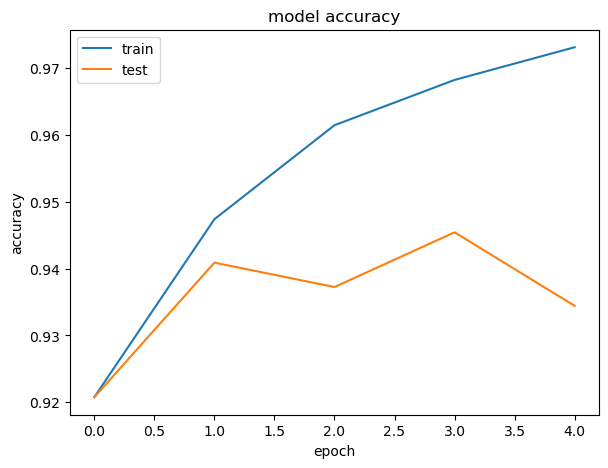

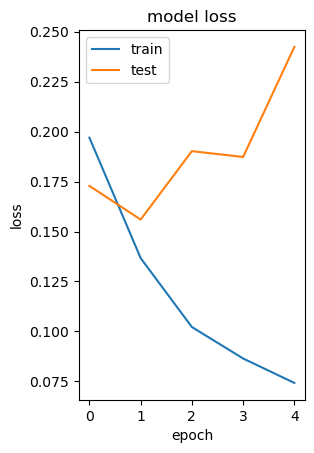

In [20]:
plt.figure(figsize=(15,5))

# History for accuracy
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# History for loss
plt.subplot(1, 2, 2)
plt.title('model loss')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
metric_data = {
    "Accuracy": history.history['val_accuracy'],
    "Precision": history.history['val_precision'],
    "Recall": history.history['val_recall'],
    "F1_score": history.history['val_f1_score'],
}

In [22]:
df = pd.DataFrame(metric_data)
df

,Accuracy,Precision,Recall,F1_score
0,0.920765,0.707318,0.905287,0.793764
1,0.940880,0.795731,0.874258,0.832762
2,0.937237,0.802725,0.832961,0.817122
3,0.945414,0.820723,0.865813,0.842310
4,0.934422,0.838448,0.757544,0.795482


In [23]:
import os

folder_name = 'Metrics'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Metrics' already exists.


In [24]:
df.index += 1
df

,Accuracy,Precision,Recall,F1_score
1,0.920765,0.707318,0.905287,0.793764
2,0.940880,0.795731,0.874258,0.832762
3,0.937237,0.802725,0.832961,0.817122
4,0.945414,0.820723,0.865813,0.842310
5,0.934422,0.838448,0.757544,0.795482


In [25]:
df.index.name = 'Epoch'
df

,Accuracy,Precision,Recall,F1_score
Epoch,,,,
1,0.920765,0.707318,0.905287,0.793764
2,0.940880,0.795731,0.874258,0.832762
3,0.937237,0.802725,0.832961,0.817122
4,0.945414,0.820723,0.865813,0.842310
5,0.934422,0.838448,0.757544,0.795482


In [26]:
df.to_csv('./Metrics/Transformer_metrics_w_epoch.csv')

In [27]:
folder_name = 'Models'
try:
    os.mkdir(folder_name)
    print(f"Directory '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{folder_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{folder_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'Models' already exists.


In [30]:
model.save("./Models/Base_Transformer_model")
print("Model saved.")

INFO:tensorflow:Assets written to: ./Models/Base_Transformer_model\assets


INFO:tensorflow:Assets written to: ./Models/Base_Transformer_model\assets


Model saved.


In [31]:
model.save('./Models/Base_Transformer.keras')
print("Model saved!")

NotImplementedError: 
Layer FeatureTokenEmbedding has arguments ['d_model']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [37]:
class FeatureTokenEmbedding(layers.Layer):
    def __init__(self, d_model, **kwargs):
        super().__init__(**kwargs)
        self.d_model = d_model
        self.dense = layers.Dense(d_model)

    def call(self, x):
        return self.dense(x)

    def get_config(self):
        config = super().get_config()
        config.update({"d_model": self.d_model})
        return config

In [39]:
model = keras.models.load_model(
    "./Models/Base_Transformer_model",
    custom_objects={"FeatureTokenEmbedding": FeatureTokenEmbedding},
    compile=False  
)

# Recompile manually
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", Precision(name='precision'), Recall(name='recall'), f1_score]
)

model.save(
    "./Models/Base_Transformer_model_clean",
    include_optimizer=False
)

INFO:tensorflow:Assets written to: ./Models/Base_Transformer_model_clean\assets


INFO:tensorflow:Assets written to: ./Models/Base_Transformer_model_clean\assets


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test_3D) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

25996/25996 [==============================] - 601s 23ms/step
[[659898  31520]
 [ 17660 122786]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    691418
           1       0.80      0.87      0.83    140446

    accuracy                           0.94    831864
   macro avg       0.88      0.91      0.90    831864
weighted avg       0.94      0.94      0.94    831864

